In [1]:
# Load necessary libraries
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
# Retrieve the stock data saved from the R file 
stk_data = pd.read_csv('stock_df.csv')

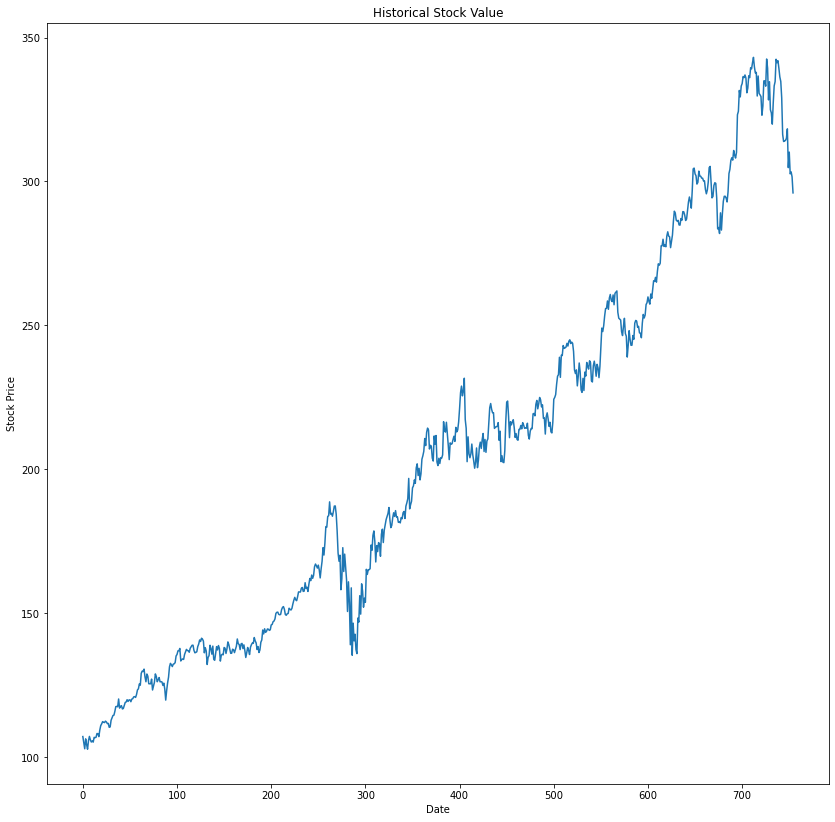

In [3]:
# Plot the historical stock value using 'Close' column
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [4]:
# Extract the Close column for scaling
df = stk_data.filter(['Close'])

# Convert the data frame to numpy array
dataset = df.values

#Get the number of rows to train the model
training_data_len = int(np.ceil(len(dataset) * .85))

training_data_len


642

In [5]:


# Create the scaler instance
scaler=MinMaxScaler(feature_range=(0,1))

# Scale the data
scaled_data = scaler.fit_transform(dataset)

# Create the data frame using scaled data
#scaled_stk_data = pd.DataFrame(data=df, index=[stk_data.Date], columns=['Close'])

# Check the first few records using head()
scaled_data

array([[1.82665471e-02],
       [9.57018738e-03],
       [6.65763780e-04],
       [1.49793959e-02],
       [6.86556442e-03],
       [0.00000000e+00],
       [1.23163948e-02],
       [1.84746068e-02],
       [1.35230732e-02],
       [1.03607462e-02],
       [1.20251286e-02],
       [1.02775398e-02],
       [1.71014865e-02],
       [1.67686066e-02],
       [1.71431084e-02],
       [2.26355524e-02],
       [2.24274927e-02],
       [1.81833448e-02],
       [2.75870902e-02],
       [3.40781529e-02],
       [3.66579183e-02],
       [3.98618673e-02],
       [3.90712751e-02],
       [3.84887469e-02],
       [4.05692197e-02],
       [3.94457769e-02],
       [3.71156265e-02],
       [3.73236863e-02],
       [3.16647961e-02],
       [3.21641220e-02],
       [4.18175159e-02],
       [4.51046670e-02],
       [4.87662867e-02],
       [4.91407552e-02],
       [5.46332367e-02],
       [6.15403897e-02],
       [6.18732737e-02],
       [6.13323300e-02],
       [7.25668997e-02],
       [5.93767105e-02],


In [6]:
# Create the scaled training dataset
train_data = scaled_data[0:int(training_data_len), :]

# Split data into train and test

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()
        
#Convert x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train

[array([0.01826655, 0.00957019, 0.00066576, 0.0149794 , 0.00686556,
       0.        , 0.01231639, 0.01847461, 0.01352307, 0.01036075,
       0.01202513, 0.01027754, 0.01710149, 0.01676861, 0.01714311,
       0.02263555, 0.02242749, 0.01818334, 0.02758709, 0.03407815,
       0.03665792, 0.03986187, 0.03907128, 0.03848875, 0.04056922,
       0.03944578, 0.03711563, 0.03732369, 0.0316648 , 0.03216412,
       0.04181752, 0.04510467, 0.04876629, 0.04914076, 0.05463324,
       0.06154039, 0.06187327, 0.06133233, 0.0725669 , 0.05937671,
       0.06191489, 0.06295513, 0.05821162, 0.05887738, 0.06307995,
       0.06757375, 0.06828113, 0.07152666, 0.06898849, 0.07119378,
       0.07136022, 0.0686556 , 0.07244208, 0.07302461, 0.07560437,
       0.07602049, 0.0748554 , 0.07901635, 0.08567389, 0.08729665])]
[0.0942870399867623]

[array([0.01826655, 0.00957019, 0.00066576, 0.0149794 , 0.00686556,
       0.        , 0.01231639, 0.01847461, 0.01352307, 0.01036075,
       0.01202513, 0.01027754, 0.017

array([[[1.82665471e-02],
        [9.57018738e-03],
        [6.65763780e-04],
        ...,
        [7.90163488e-02],
        [8.56738867e-02],
        [8.72966514e-02]],

       [[9.57018738e-03],
        [6.65763780e-04],
        [1.49793959e-02],
        ...,
        [8.56738867e-02],
        [8.72966514e-02],
        [9.42870400e-02]],

       [[6.65763780e-04],
        [1.49793959e-02],
        [6.86556442e-03],
        ...,
        [8.72966514e-02],
        [9.42870400e-02],
        [9.24978334e-02]],

       ...,

       [[5.83572622e-01],
        [6.04876642e-01],
        [5.92518630e-01],
        ...,
        [7.64490583e-01],
        [7.77014941e-01],
        [7.76765293e-01]],

       [[6.04876642e-01],
        [5.92518630e-01],
        [5.83780681e-01],
        ...,
        [7.77014941e-01],
        [7.76765293e-01],
        [7.72063408e-01]],

       [[5.92518630e-01],
        [5.83780681e-01],
        [5.83947090e-01],
        ...,
        [7.76765293e-01],
        [7.7206

In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

582/582 [==============================] - 39s 56ms/step - loss: 0.0021


In [8]:
# Create test data set
test_data = scaled_data[training_data_len - 60: , :]

# Create x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# # Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [9]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9.447314884592394

In [10]:
# Get Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mape

2.3251644167940864

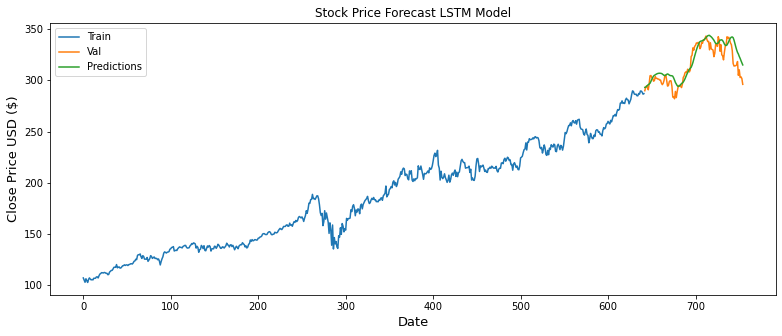

In [11]:
# Plot the data
pd.options.mode.chained_assignment = None
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(13, 5))
plt.title('Stock Price Forecast LSTM Model')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Close Price USD ($)', fontsize=13)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()